# Regression Fundamentals

In [41]:
# import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("darkgrid")

## Load the dataset

In [20]:
# load the dataset 
use_cols = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

data = pd.read_csv("./data/boston-housing-dataset.csv",
                   usecols=use_cols)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2



| Feature | Description |
|---------|-------------|
| **CRIM** | Per capita crime rate by town |
| **ZN** | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS** | Proportion of non-retail business acres per town |
| **CHAS** | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| **NOX** | Nitric oxides concentration (parts per 10 million) |
| **RM** | Average number of rooms per dwelling |
| **AGE** | Proportion of owner-occupied units built prior to 1940 |
| **DIS** | Weighted distances to five Boston employment centres |
| **RAD** | Index of accessibility to radial highways |
| **TAX** | Full-value property-tax rate per $10,000 |
| **PTRATIO** | Pupil-teacher ratio by town |
| **LSTAT** | Percent of households with low socioeconomic status |
| **MEDV** *(Target)* | Median value of owner-occupied homes in $1000's |

In [21]:
df = data[['RM','MEDV']]
df.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


## Linear Relationship

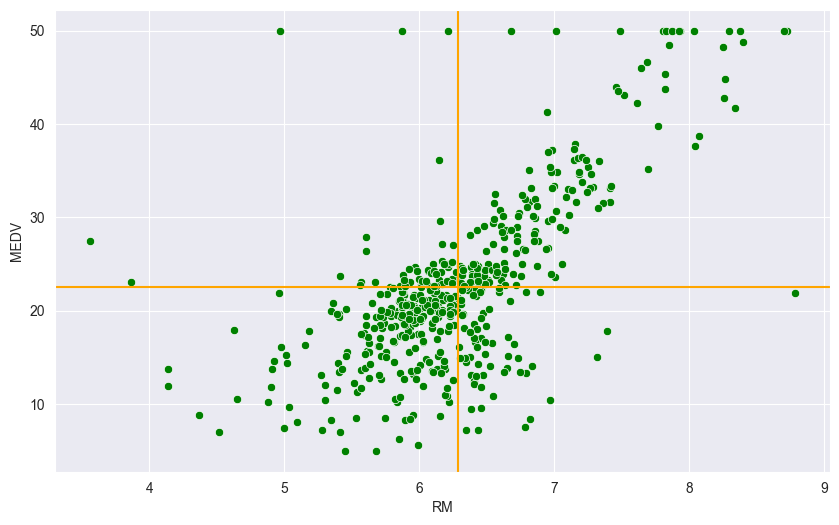

In [22]:
# let us do a scatterplot 
plt.figure(figsize=(10,6))

# Scatterplot is a mathematical diagram to display valiues of two variables for a set of data
sns.scatterplot(data=data,
                x='RM',
                y='MEDV',
                color='green')

mean_x = np.mean(df['RM'])
mean_y = np.mean(df['MEDV'])

# let us now draw two lines for the mean 
plt.axhline(y=mean_y,
            color='orange')
plt.axvline(x=mean_x,
            color='orange')
plt.show()

In [23]:
from scipy.stats import pearsonr

corr = pearsonr(x=df['RM'],
                y=df['MEDV'])[0]

print(f'The percentage of variance in MEDV(target) explained by RM is : {corr**2*100:.2f}%')

The percentage of variance in MEDV(target) explained by RM is : 48.35%



### 🧠 When to use which?

| Correlation Type | Use When... | Captures |
|------------------|-------------|----------|
| **Pearson**      | You want to measure **linear relationships** between numeric variables | Only linear strength |
| **Spearman**     | Data may be **nonlinear but monotonic** (like ranks) or **ordinal** (like Age groups) | Rank-based correlation |


**TIP**
>As a way to estimate if a correlation is relevant or not, just **square it**; the result will **represent the percentage of the variance shared by the two variables.**

## Linear Regression 

In [24]:
# import library 
import statsmodels.formula.api as smf

# build and fit the simple linear regression model
fitted_reg = smf.ols(
    formula='MEDV ~ RM',
    data=df
).fit()

# view the summary
fitted_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           2.49e-74
Time:                        13:22:14   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# let us separate out the coeffecients of this SLR model
betas = fitted_reg.params
betas

Intercept   -34.670621
RM            9.102109
dtype: float64

In [26]:
# fitted values 
fitted_reg.fittedvalues

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

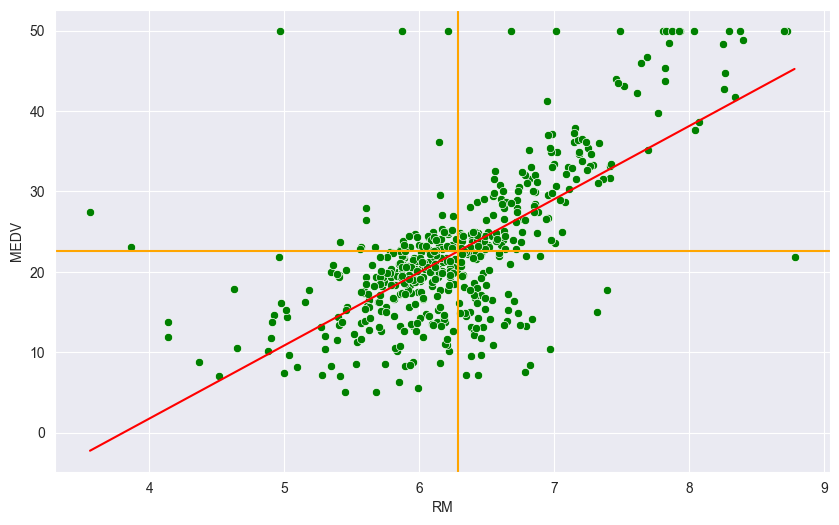

In [27]:
# let us draw the line 
# let us do a scatterplot 
plt.figure(figsize=(10,6))

sns.scatterplot(data=data,
                x='RM',
                y='MEDV',
                color='green')

mean_x = np.mean(df['RM'])
mean_y = np.mean(df['MEDV'])

sns.lineplot(x=df['RM'],
             y=fitted_reg.fittedvalues,
             color='red')

# let us now draw two lines for the mean 
plt.axhline(y=mean_y,
            color='orange')
plt.axvline(x=mean_x,
            color='orange')

### Properties of Simple Linear Regression Parameters

Consider the simple linear regression model:

$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i, \quad i = 1,\dots,n
$

where:

* $(E[\varepsilon_i] = 0)$
* $(Var(\varepsilon_i) = \sigma^2)$
* errors are independent


#### Regression Parameters Are Linear Combinations of $(Y_i)$

The **OLS estimators** are:

$
\hat{\beta}_1 = \frac{\sum (X_i - \bar X)(Y_i - \bar Y)}{\sum (X_i - \bar X)^2}
$

$
\hat{\beta}_0 = \bar Y - \hat{\beta}_1 \bar X
$

##### Key insight

Both estimators can be rewritten as:

$
\hat{\beta}_1 = \sum_{i=1}^{n} c_i Y_i
$

$
\hat{\beta}_0 = \sum_{i=1}^{n} d_i Y_i
$

where $(c_i)$ and $(d_i)$ depend **only on the X values**, not on Y.

✅ **Conclusion**
Both the intercept and slope are **linear combinations of the observed responses $(Y_i)$**.

This is why:

* OLS estimators are easy to analyze mathematically
* Expectations and variances can be derived cleanly
* OLS belongs to the class of *linear estimators*


#### Unbiasedness of the Estimators (Theory)

Using the model assumptions:

$
E[\hat{\beta}_1] = \beta_1
$

$
E[\hat{\beta}_0] = \beta_0
$

##### Interpretation

On average, across many repeated samples from the same population:

* the slope estimator hits the true slope
* the intercept estimator hits the true intercept

Unbiasedness does **not** mean:

* estimates are always close
* estimates have small variance

It only means they are *correct on average*.


#### Unbiasedness Demonstrated via Simulation (Very Important)


In [30]:
import numpy as np

np.random.seed(42)

n = 50
n_simulations = 5000

beta0_hat = []
beta1_hat = []

for _ in range(n_simulations):
    # draw a random sample of size 50 from the observed data
    df_sample = df.sample(n=n, replace=False)
    
    model = smf.ols('MEDV ~ RM', data=df_sample).fit()
    
    beta0_hat.append(model.params['Intercept'])
    beta1_hat.append(model.params['RM'])

np.mean(beta0_hat), np.mean(beta1_hat)

(np.float64(-35.34614787477315), np.float64(9.196624732384377))

#### 🧠 How to Explain This Properly

##### What we are doing

* Treat the observed dataset (`df`) as the **population**
* Draw many random samples of size 50
* Fit a regression model to each sample
* Record the estimated parameters
* Compute their averages


##### What this demonstrates

$
E(\hat{\beta}_0) \approx \beta_0, \quad
E(\hat{\beta}_1) \approx \beta_1
$

This **empirically illustrates unbiasedness** under repeated sampling.


##### Subtle but Important Pedagogical Note

Strictly speaking:

* Unbiasedness is defined **with respect to the true population**
* Using the observed dataset approximates that population

This is **standard practice in teaching** and is conceptually sound for intuition-building.


##### Key Teaching Line (you’ll like this)

> *Unbiasedness is not about one dataset —
> it is about what happens when the sampling process is repeated.*



#### Variance of the Slope Estimator — Explained in Code

##### Theoretical result

$
\mathrm{Var}(\hat{\beta}_1) = \frac{\sigma^2}{\sum (X_i - \bar X)^2}
$

📌 **Key implication**

$
\mathrm{Var}(\hat{\beta}_1) \propto \frac{1}{\mathrm{Var}(X)}
$

We’ll now **demonstrate this empirically**.


#### Step 1: Create Two Samples with Different Var(X)

We keep:

* same response variable (`MEDV`)
* same sample size
* same modeling approach

Only the **spread of RM** changes.

In [36]:
import numpy as np

np.random.seed(42)

n = 50
n_simulations = 5000

# RM values tightly clustered
df_low_var = df.loc[
    df['RM'].between(df['RM'].quantile(0.45), df['RM'].quantile(0.55))
]

beta1_low_var = []

for _ in range(n_simulations):
    sample = df_low_var.sample(n=n, replace=True)
    model = smf.ols('MEDV ~ RM', data=sample).fit()
    beta1_low_var.append(model.params['RM'])

np.var(beta1_low_var)

np.float64(496.88540096262375)

In [37]:
df_high_var = df.sample(n=len(df), replace=False)

beta1_high_var = []

for _ in range(n_simulations):
    sample = df_high_var.sample(n=n, replace=True)
    model = smf.ols('MEDV ~ RM', data=sample).fit()
    beta1_high_var.append(model.params['RM'])

np.var(beta1_high_var)

np.float64(4.307412160154656)

#### Step 2: Compare the Variances

In [38]:
np.var(beta1_low_var) > np.var(beta1_high_var)

np.True_

✅ Same model, same $n$, same $Y$ — only $Var(X)$ changed

#### Step 3: Make the Relationship Explicit

Compute the variance of RM in both cases:

In [39]:
np.var(df_low_var['RM']), np.var(df_high_var['RM'])

(np.float64(0.0014157262591311065), np.float64(0.49269521612976297))

We see:

$
\text{Low Var(RM)} \Rightarrow \text{High Var}(\hat{\beta}_1)
$

$
\text{High Var(RM)} \Rightarrow \text{Low Var}(\hat{\beta}_1)
$


#### 🧠 What This Code Is Teaching

* The slope estimator measures **change in Y per unit change in X**
* If X barely changes, the slope becomes unstable
* More spread in X gives **more information** about the relationship

📌 **Regression learns from variation**


##### Teaching Insight

> *A precise slope does not come from more data points alone,
> but from more variation in the predictor.*



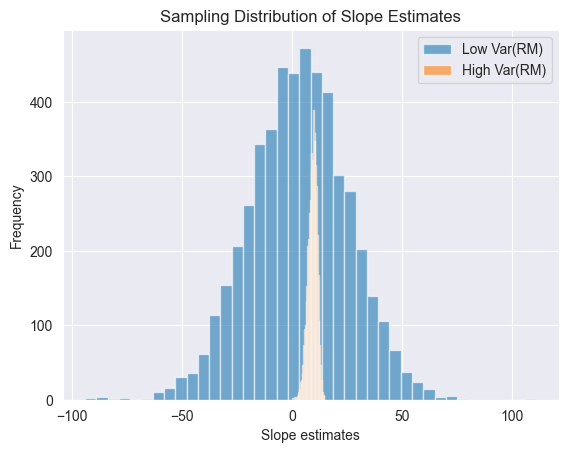

In [40]:
plt.hist(beta1_low_var, bins=40, alpha=0.6, label='Low Var(RM)')
plt.hist(beta1_high_var, bins=40, alpha=0.6, label='High Var(RM)')
plt.legend()
plt.xlabel('Slope estimates')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Slope Estimates')
plt.show()


We **see** the wider spread for low-variance RM.


#### Final Takeaway

* $( \mathrm{Var}(\hat{\beta}_1) )$ depends inversely on predictor variance
* Increasing X spread improves slope precision
* This is a **design principle**, not just a math result